<a href="https://colab.research.google.com/github/gunupudilakshmipujitha/BasicMl/blob/main/APPL_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***FINAL PROJECT*** 

#PROJECT ON HEART DISEASE UCI

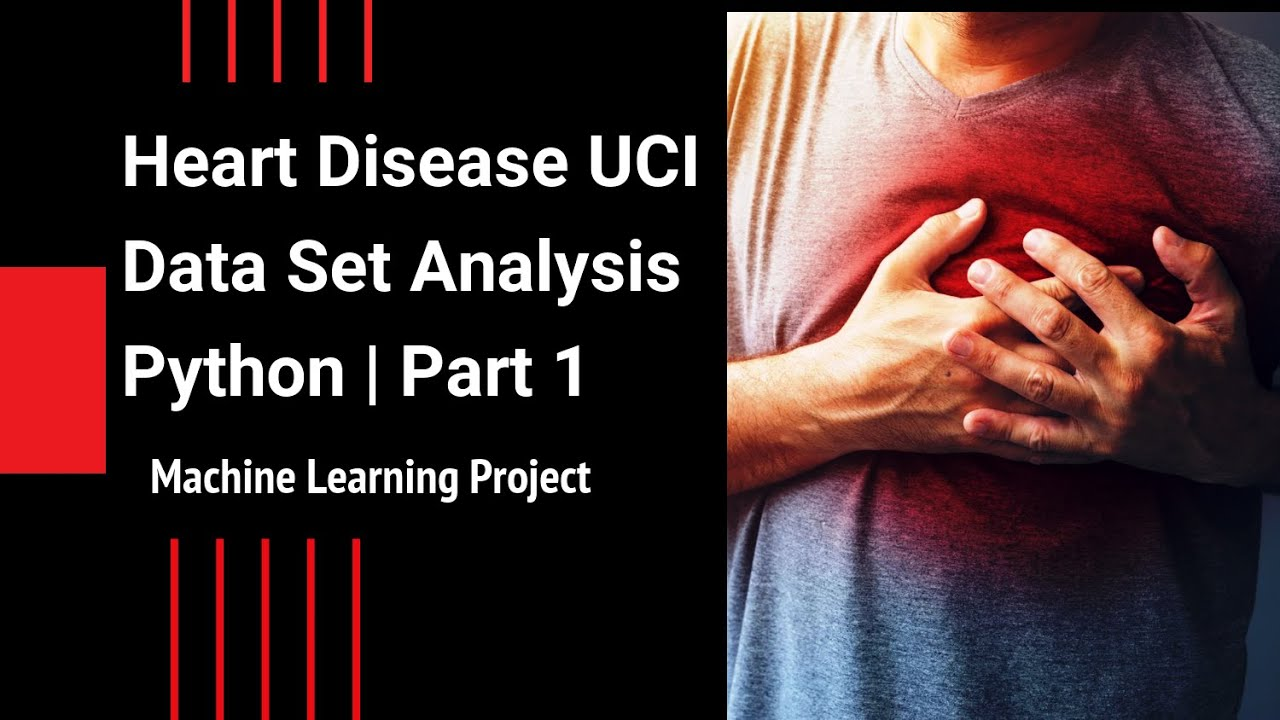

Spiritualist mediums claim to be able to communicate with the dead, they offer such services in exchange of some retribution. They will often sense that some person that died had some some sort of chest pain beforehand. According to WHO, the six most common causes of death are either heart or lung disease, excluding neonatal diseases. Are medium really able to access a different plane of the universe or are they intuitively good at Bayesian statistics?

Heart diseases are the leading cause of death globally. Each year, 17.9 million deaths occur, that is one death every other second. One third of these deaths occur below the age of 70. A lot of effort is provided by researchers all over the world to provide prevention, help, relieve, and hopefully one day cure heart diseases. Carmat, a french company, just received approval in December 2020 to sell their artificial heart in Europe

The dataset named "Cleveland Heart Disease Dataset" comes from a study conducted in 1988 and originates from the UCI Machine Learning Repository. The dataset was split in two: a training and a testing set. The task is to get the best predictor and guess if a patient has a heart disease.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

log=pd.read_csv("heart.csv")

1.   List item
2.   List item


log.head(10)

In [2]:
log = pd.read_csv("heart.csv")
log.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
log.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


log.info()

 **EDA**(EXPLORATARY DATA ANALYSIS)#

In [4]:
log["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
log.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
log.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X=log.loc[:,log.columns!='target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y=log.loc[:,"target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
X_encoded=pd.get_dummies(log,columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [10]:
Data=log.head(10)
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# CLEANING THE DATA

In [11]:
log.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
log.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

# DATA VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


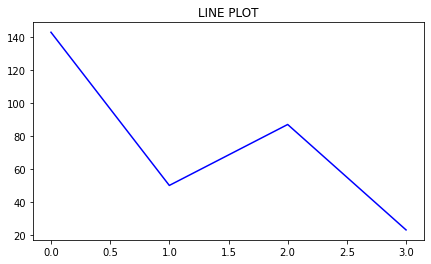

In [13]:
plt.figure(figsize=(7,4))
sns.lineplot(list(log["cp"].value_counts()[0:8].keys()),list(log["cp"].value_counts()[0:8]),color='b')
plt.title('LINE PLOT')
plt.show()

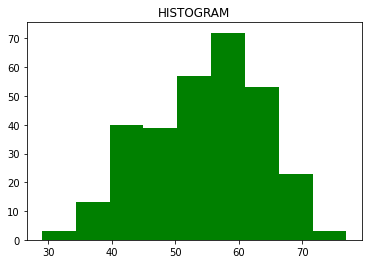

In [14]:
plt.hist(log['age'],bins=9,color="g")
plt.title('HISTOGRAM')
plt.show()

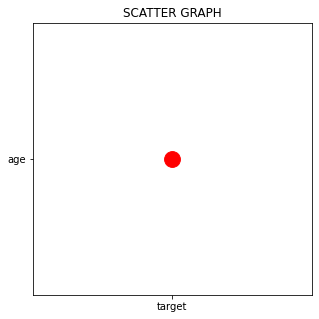

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x='target',y='age',marker=".",c='r',s=1000)
plt.title('SCATTER GRAPH')
plt.show()

(14.5, -0.5)

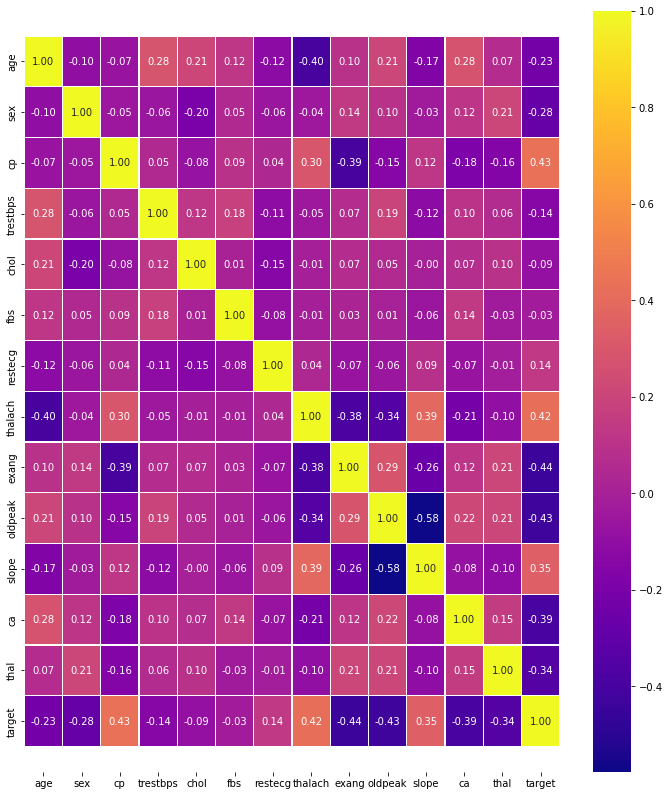

In [46]:
corr_matrix = log.corr()
fig, ax = plt.subplots(figsize=(12, 14))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.2,
                 fmt=".2f",
                 cmap="plasma");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

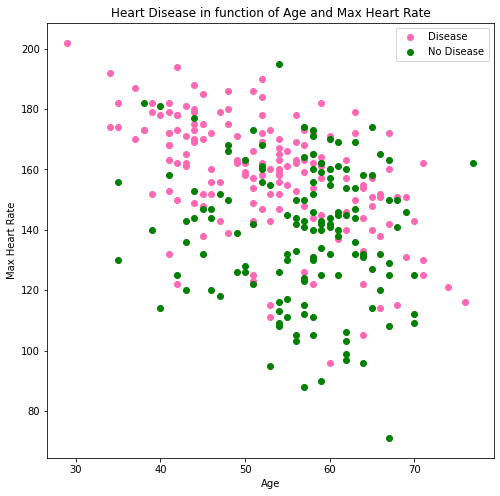

In [47]:
plt.figure(figsize=(8, 8))

# Scatter with postivie examples
plt.scatter(log.age[log.target==1],
            log.thalach[log.target==1],
            c="hotpink")

# Scatter with negative examples
plt.scatter(log.age[log.target==0],
            log.thalach[log.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# SPLITING THE DATASET

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)


In [17]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
X_train

array([[-0.27090572, -0.77014738, -1.17448795, ...,  4.03555625,
        -1.15192147, -0.75592895],
       [ 1.3708101 ,  1.18685467,  0.59584563, ..., -0.24779731,
         0.86811473, -0.75592895],
       [ 0.27633288,  1.0717369 , -2.34174086, ..., -0.24779731,
        -1.15192147,  1.32287566],
       ...,
       [-2.78820331, -0.07944077, -0.82431208, ..., -0.24779731,
         0.86811473, -0.75592895],
       [-0.38035344,  0.49614806,  1.02383837, ..., -0.24779731,
        -1.15192147,  1.32287566],
       [-0.05201028,  1.0717369 , -0.27959405, ..., -0.24779731,
        -1.15192147,  1.32287566]])

In [20]:
X_test

array([[ 0.82357149,  1.64732574, -1.60248069, ..., -0.24779731,
        -1.15192147,  1.32287566],
       [ 0.16688516, -0.07944077, -0.49359042, ..., -0.24779731,
        -1.15192147,  1.32287566],
       [-0.70869661, -0.07944077,  0.18730711, ..., -0.24779731,
        -1.15192147,  1.32287566],
       ...,
       [-1.80317382, -0.65502961, -0.29904827, ..., -0.24779731,
        -1.15192147,  1.32287566],
       [ 0.27633288,  1.0717369 ,  0.57639142, ...,  4.03555625,
        -1.15192147, -0.75592895],
       [ 1.04246693,  2.79850341,  1.52964796, ..., -0.24779731,
         0.86811473, -0.75592895]])

In [21]:
y_pred_svc = svc.predict(X_test)

In [22]:
y_pred_svc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_svc })
y_pred_svc_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


# MACHINE LEARNING MODELS

In [23]:
y_pred_svc_df.head()

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0


In [24]:
y_pred_svc_df.tail()

,Expected,Predicted
0,1,1
288,0,0
259,0,0
179,0,0
110,1,1


In [25]:
y_pred_svc_df.shape

(61, 2)

In [26]:
y_pred_svc_df.describe()

,Expected,Predicted
count,61.000000,61.000000
mean,0.508197,0.508197
std,0.504082,0.504082
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# CONFUSION MATRICS ACCURACY SCORE

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
svc_cm = confusion_matrix(y_test, y_pred_svc)
svc_cm

array([[30,  0],
       [ 0, 31]])

In [29]:
svc_acc = accuracy_score(y_test, y_pred_svc) 
svc_acc

1.0

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr2=LinearRegression()

In [32]:
lr2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(random_state=5)

In [35]:
model = clf.fit(X_train, y_train)

In [36]:
from sklearn.metrics import accuracy_score
print('Correct Prediction(%):', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction(%): 100.0


In [37]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [40]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,age,[-0.03289694020690515]
1,sex,[-0.16610994975076268]
2,cp,[-0.11473854245343804]
3,trestbps,[0.23180234824383256]
4,chol,[-0.23945323710052477]
5,fbs,[3.5101912941761317]
6,restecg,[0.2424619906593438]
7,thalach,[-0.2424619906593438]
8,exang,[-0.27015787271552044]
9,oldpeak,[0.07566988268759725]


# SPLITING

In [41]:

print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# A BRIEF DESCRIPTION

***Exploratory data analysis***(EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.
#Data sourcing - load the data set
#Data cleaning - remove the unneccesary columns in dataset
#Data visualization - visuvalise the data¶

All machine learning models are categorized as either supervised or unsupervised. If the model is a supervised model, it’s then sub-categorized as either a regression or classification model.

Here we used 3 machine learning models.

           1.LOGISTIC REGRESSION

           2.DECISION TREE CLASSIFIER

           3.LINEAR REGRESSION

#1.Logistic Regression.
Logistic regression is similar to linear regression but is used to model the probability of a finite number of outcomes, typically two. There are a number of reasons why logistic regression is used over linear regression when modeling probabilities of outcomes. In essence, a logistic equation is created in such a way that the output values can only be between 0 and 1

#2.RANDOM FOREST CLASSIFIER
 Random Forest Classifier. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. Random forests has a variety of applications, such as recommendation engines, image classification and feature selection.

#3.CONFUSION MATRICS ACCURACY SCORE
Now we will introduce the confusion matrix which is required to compute the accuracy of the machine learning algorithm in classifying the data into its corresponding labels. The following diagram illustrates the confusion matrix for a binary classification problem

#DATA SPLITTING
Data splitting can be made even more effective by periodically retrieving and recombining the parts, and then splitting the data in a different way among different servers, and using a different encryption key. Thus, even if a hacker makes progress towards obtaining split data, chances are that the data will have been reorganized before the hacker manages to obtain all the necessary components. By rearranging the data often enough, a network administrator can stay ahead of even the most adept hacker



